**SPAM MAIL PREDICTION USING BINARY CLASSIFICATION (svm and logistic Regression)**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [4]:
# DATA COLLECTION AND DATA PREPROCESSING

mix_mail_data = pd.read_csv ('/content/mail_data.csv')

In [6]:
print (mix_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
mix_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
mix_mail_data.isnull().values.any()

False

In [11]:
mix_mail_data.isnull().sum ()

Category    0
Message     0
dtype: int64

In [12]:
# replace the null values with a null string (incase of null values )
mail_data = mix_mail_data.where((pd.notnull(mix_mail_data)),'')

In [13]:
mail_data.shape

(5572, 2)

In [14]:
# Label Encoding

# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

SPAM = 0
HAM = 1

In [15]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [16]:
print (X)
print (Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


*Splitting the Dataset into training Dataset and test dataset *

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Feature Extraction: Transform the text data to feature vectors using TF-IDF

In [20]:
feature_extraction = TfidfVectorizer(min_df=3, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)



In [23]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# TRAINING AND EVALUATION

In [24]:
# Train and evaluate SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_features, Y_train)



LinearSVC()

# Prediction on training data

In [26]:
svm_train_predictions = svm_model.predict(X_train_features)
svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)

In [27]:
svm_train_accuracy


0.9975319721785955

In [28]:

# Prediction on test data
svm_test_predictions = svm_model.predict(X_test_features)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)


In [29]:
svm_test_accuracy


0.9838565022421525

LOGISTIC REGRESSION

In [30]:

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_features, Y_train)


LogisticRegression()

In [31]:
# Prediction on training data
lr_train_predictions = lr_model.predict(X_train_features)
lr_train_accuracy = accuracy_score(Y_train, lr_train_predictions)


In [32]:
lr_train_accuracy


0.9744222571236257

In [33]:
# Prediction on test data
lr_test_predictions = lr_model.predict(X_test_features)
lr_test_accuracy = accuracy_score(Y_test, lr_test_predictions)


In [34]:
lr_test_accuracy


0.9614349775784753

In [35]:

# PREDICTIVE SYSTEM

input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill my promise. You have been wonderful and a blessing at all times"]


In [37]:

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction using SVM
svm_prediction = svm_model.predict(input_data_features)
print(f"SVM Prediction: {'Ham mail' if svm_prediction[0] == 1 else 'Spam mail'}")

# Making prediction using Logistic Regression
lr_prediction = lr_model.predict(input_data_features)
print(f"Logistic Regression Prediction: {'Ham mail' if lr_prediction[0] == 1 else 'Spam mail'}")


SVM Prediction: Ham mail
Logistic Regression Prediction: Ham mail


In [45]:
models = pd.DataFrame({
    "Model": ["SVM", "Logistic Regression"],
    " Test Accuracy Score": [svm_test_accuracy, lr_test_accuracy] ,
    " Train Accuracy SCore" : [svm_train_accuracy , lr_train_accuracy]
})

In [46]:
models


,Model,Test Accuracy Score,Train Accuracy SCore
0,SVM,0.983857,0.997532
1,Logistic Regression,0.961435,0.974422


,Model,Test Accuracy Score,Train Accuracy SCore
0,SVM,0.983857,0.997532
1,Logistic Regression,0.961435,0.974422


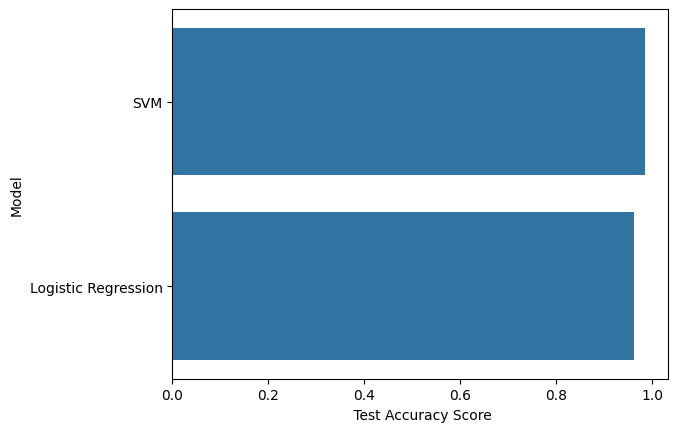

In [49]:
import seaborn as sns
sns.barplot(x=" Test Accuracy Score", y="Model",data=models)
models.sort_values(by=" Test Accuracy Score", ascending = False)

,Model,Test Accuracy Score,Train Accuracy SCore
0,SVM,0.983857,0.997532
1,Logistic Regression,0.961435,0.974422


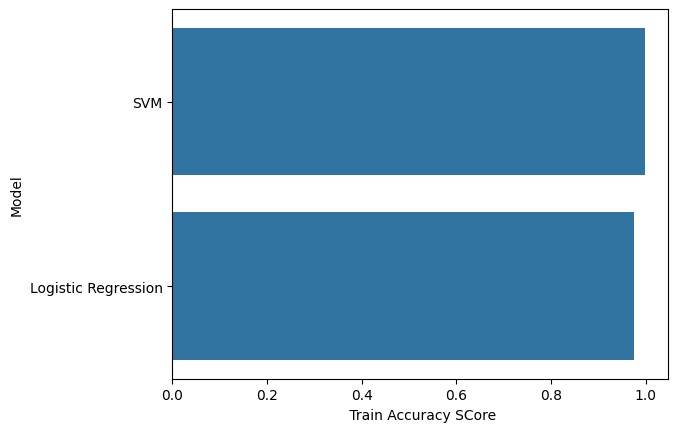

In [53]:
import seaborn as sns
sns.barplot(x=" Train Accuracy SCore", y="Model",data=models)
models.sort_values(by=" Test Accuracy Score", ascending = False)